# Introdution to Exploratory data analysis



## 1 Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

## 2 Loading the data (using cars dataset)

In [4]:
df = pd.read_csv("D:\\data.csv")

In [5]:
#Displaying the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
#Displaying bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## Checking the type of data

In [7]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## Dropping irrevelent columns

#### Here we will drop some unwanted columns which are Engine Fuel Type, 
#### Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size
* The axis parameter in the drop method of Pandas is used to specify whether you want to drop labels from rows or columns. It can take the values 0 or 1, where:

axis=0 or 'index': This means that you want to drop rows.
axis=1 or 'columns': This means that you want to drop columns.

In [8]:
df=df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Renaming the columns

In [10]:
df=df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders", "Transmission Type":"Transmission", "Driven_Wheels":"Drive Mode","highway MPG":"MPG-H", "city mpg":"MPG-C", "MSRP":"Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Dropping the duplicate rows

In [12]:
#before removing no of rows
df.shape

(11914, 10)

In [13]:
duplicate_rows_df=df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (989, 10)


In [14]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

#### Removing 989 rows of duplicate data

In [16]:
df=df.drop_duplicates()
df.head(10)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


In [17]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

# Dropping the missing or null values

In [18]:
print(df.isnull())

        Make  Model   Year     HP  Cylinders  Transmission  Drive Mode  MPG-H  \
0      False  False  False  False      False         False       False  False   
1      False  False  False  False      False         False       False  False   
2      False  False  False  False      False         False       False  False   
3      False  False  False  False      False         False       False  False   
4      False  False  False  False      False         False       False  False   
...      ...    ...    ...    ...        ...           ...         ...    ...   
11909  False  False  False  False      False         False       False  False   
11910  False  False  False  False      False         False       False  False   
11911  False  False  False  False      False         False       False  False   
11912  False  False  False  False      False         False       False  False   
11913  False  False  False  False      False         False       False  False   

       MPG-C  Price  
0    

In [19]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [20]:
df=df.dropna() #Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [21]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


# Detecting outliers
An outlier is a point or set of points that are different from other points. 
Sometimes they can be very high or very low.

<Axes: xlabel='Price'>

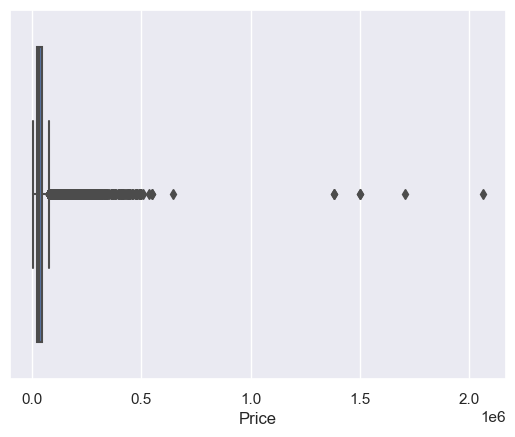

In [23]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

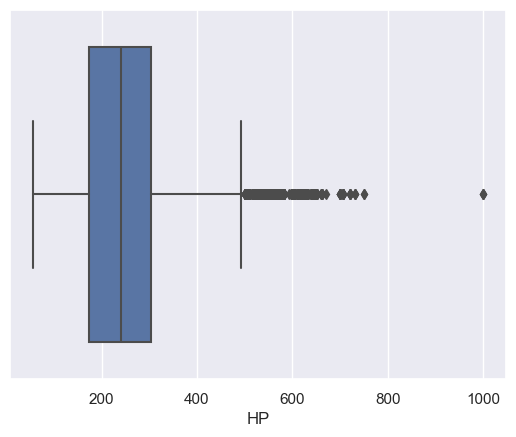

In [24]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

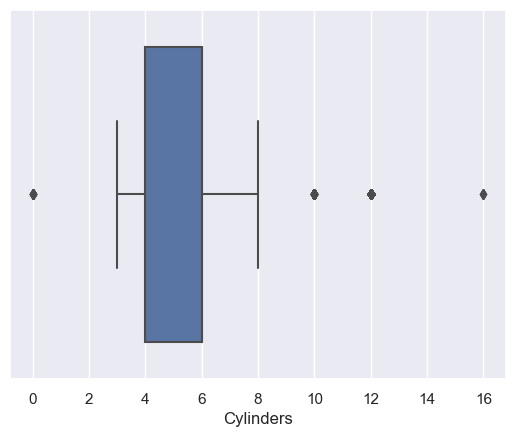

In [25]:
sns.boxplot(x=df['Cylinders'])

In [36]:
columns_to_convert = ['Price','HP','Cylinders']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [39]:
Q1 = df[columns_to_convert].quantile(0.25)
Q3 = df[columns_to_convert].quantile(0.75)
IQR=Q3-Q1
print(IQR)

Price        21327.5
HP             130.0
Cylinders        2.0
dtype: float64


In [41]:
df[columns_to_convert] =df[columns_to_convert][~((df[columns_to_convert] < (Q1 - 1.5 * IQR)) |(df[columns_to_convert] > (Q3 + 1.5 * IQR))).any(axis=1)]
df[columns_to_convert].shape

(10827, 3)

# Plot different features against one another(scatter), against frequency (histogram)


Text(0.5, 0, 'Make')

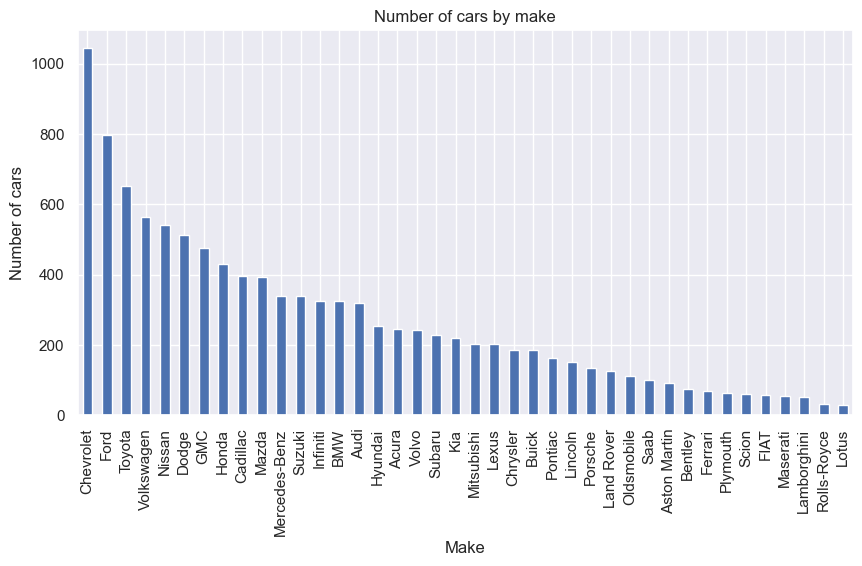

In [43]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel("Make")

# Heat maps
Heat Maps is a type of plot which is necessary when we need to find the dependent variables.

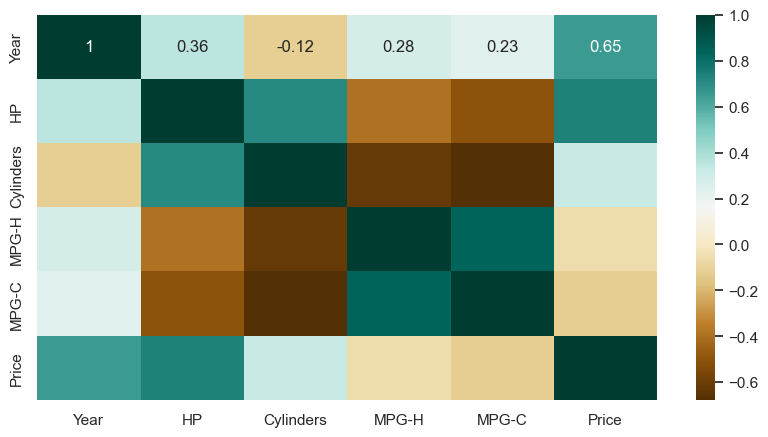

In [49]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]
plt.figure(figsize=(10, 5))
c = df_numeric.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

# Scatter plot


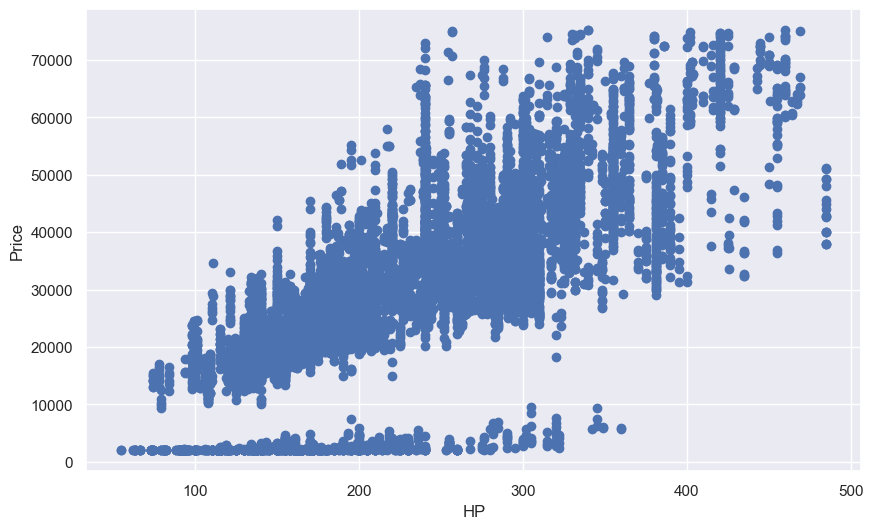

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()